# **Building a model using Logistic Regression Algorithm**

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# Load the credit card dataset from a csv file
df = pd.read_csv('credit_card_data.csv')

# Display the first few rows of the dataset
df.head()

,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,1,2748.58,14.23,Travel,77,Female,37407,Suburban,1,1
1,2,3578.79,0.24,Travel,34,Male,197616,Suburban,0,0
2,3,3017.79,11.42,Travel,43,Female,114748,Urban,3,1
3,4,2728.97,17.01,Travel,75,Female,96347,Rural,4,1
4,5,2124.04,1.06,Online,48,Male,151085,Suburban,3,1


## **Essential Exploratory Data Analysis (EDA)**

In [19]:
# Summary statistics

df.describe()

,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2484.648500,12.272320,48.828000,110814.807000,2.523000,0.719000
std,288.819436,1450.813956,7.178521,17.898737,52412.165515,1.671606,0.449712
min,1.000000,12.720000,0.010000,18.000000,20030.000000,0.000000,0.000000
25%,250.750000,1245.592500,6.127500,34.000000,67140.750000,1.000000,0.000000
50%,500.500000,2411.800000,12.470000,50.000000,109850.500000,2.000000,1.000000
75%,750.250000,3688.930000,18.672500,64.000000,157228.500000,4.000000,1.000000
max,1000.000000,4999.040000,23.960000,79.000000,199422.000000,5.000000,1.000000


In [21]:
# Check for missing values

df.isnull().sum()

TransactionID          0
TransactionAmount      0
TransactionTime        0
MerchantCategory       0
CustomerAge            0
CustomerGender         0
CustomerIncome         0
TransactionLocation    0
PreviousFraudCount     0
Fraud                  0
dtype: int64

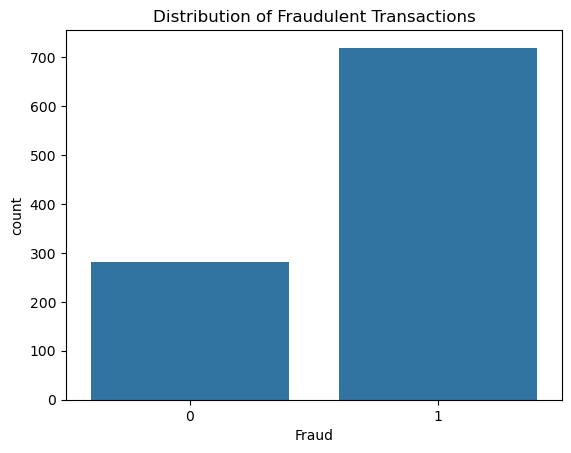

In [23]:
# Distribution of target variable

sns.countplot(x='Fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

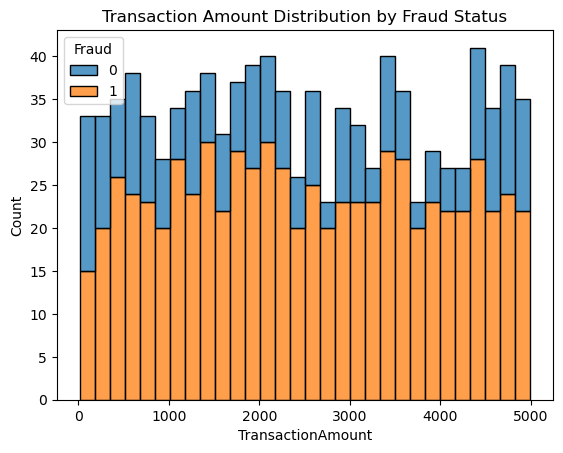

In [25]:
# Distribution of Transaction Amount by Fraud status

sns.histplot(data=df, x='TransactionAmount', hue='Fraud', multiple='stack', bins=30)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

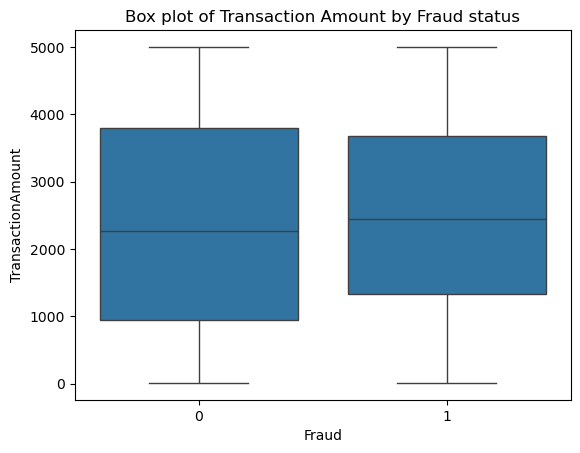

In [27]:
# Box plot for Transaction Amount by Fraud status
sns.boxplot(x='Fraud', y='TransactionAmount', data=df)
plt.title('Box plot of Transaction Amount by Fraud status')
plt.show()

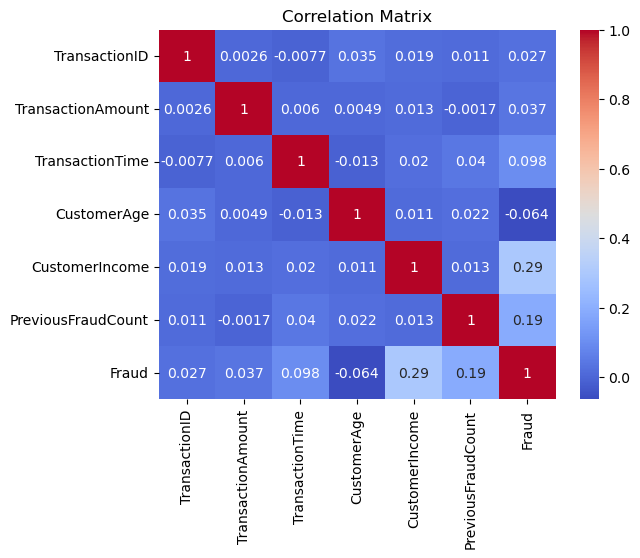

In [29]:
# Correlation matrix

num_cols = list()

for column in df.columns:
    if df[column].dtype != object:
        num_cols.append(column)

correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **Data Preprocessing**

In [31]:
# Encode categorical variables
label_encoders = {}
for column in ['MerchantCategory', 'CustomerGender', 'TransactionLocation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Feature and target
x = df.drop(['TransactionID', 'Fraud'], axis=1)
y = df['Fraud']

In [33]:
x.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,2748.58,14.23,3,77,0,37407,1,1
1,3578.79,0.24,3,34,1,197616,1,0
2,3017.79,11.42,3,43,0,114748,2,3
3,2728.97,17.01,3,75,0,96347,0,4
4,2124.04,1.06,0,48,1,151085,1,3


In [35]:
# Split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [37]:
# Feature scaling

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [41]:
# Display accuracy and performance metrics

print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 75.33

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        89
           1       0.77      0.93      0.84       211

    accuracy                           0.75       300
   macro avg       0.72      0.63      0.64       300
weighted avg       0.74      0.75      0.72       300



----------

# **Building a another model using KNN algorithm (This model is not a Logistic Regression Algorithm*)**

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# K-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [47]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

In [49]:
# Display accuracy and performance metrics
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy*100:.2f}')
print('\nK-Nearest Neighbors Classification Report:')
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 75.00

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.39      0.48        89
           1       0.78      0.90      0.84       211

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.75      0.73       300



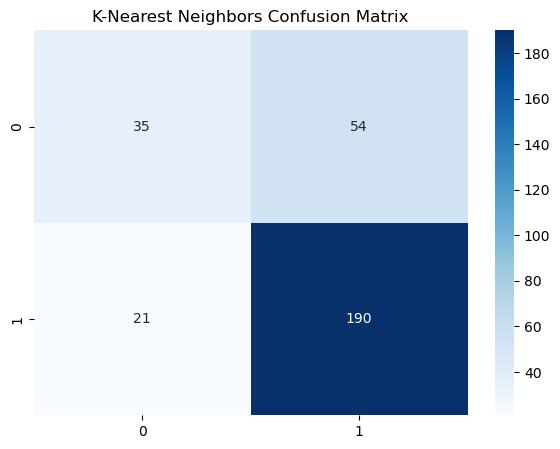

In [51]:
# Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

-------

## **Building a model using Decision Tree Algorithm**

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
help (DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [55]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_pred = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

In [59]:
# Display accuracy and performance metrics

print(f'Decision Tree Accuracy: {decision_tree_accuracy*100:.2f}')
print('\nDecision Tree Classification Report:')
print(classification_report(y_test, decision_tree_pred))

Decision Tree Accuracy: 71.00

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.43      0.47        89
           1       0.77      0.83      0.80       211

    accuracy                           0.71       300
   macro avg       0.64      0.63      0.63       300
weighted avg       0.70      0.71      0.70       300



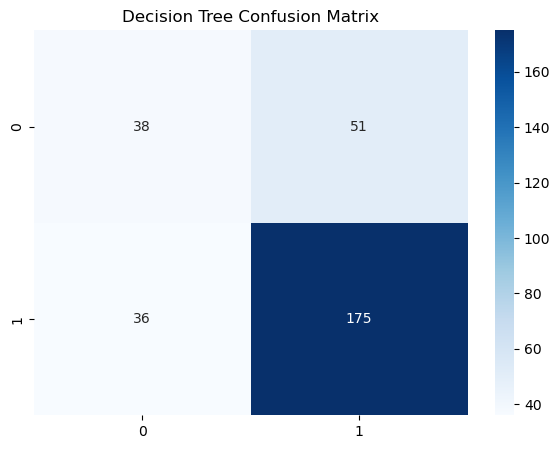

In [61]:
# Confusion Matrics

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, decision_tree_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

-------

## **Building a model using Random Forest Algorithm**

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Create and train Random Forest Algorithm model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if

In [74]:
# Make Predictions

y_pred = rf_model.predict(x_test)

In [76]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.33%


In [78]:
# Print classification report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.39      0.49        89
           1       0.78      0.91      0.84       211

    accuracy                           0.75       300
   macro avg       0.71      0.65      0.66       300
weighted avg       0.74      0.75      0.73       300



In [82]:
# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 35  54]
 [ 20 191]]


-------

## **Building a model using Support Vector Machine Algorithm**

In [85]:
from sklearn.svm import SVC

In [89]:
# Support Vector Machine

svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [91]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [95]:
# Display accuracy and performance metrix

print(f'Support Vector MAchine Accuracy: {svm_accuracy*100:.2f}')
print('\nSupport Vector Machine Classification Report:')
print(classification_report(y_test, svm_pred))

Support Vector MAchine Accuracy: 77.00

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.35      0.47        89
           1       0.78      0.95      0.85       211

    accuracy                           0.77       300
   macro avg       0.76      0.65      0.66       300
weighted avg       0.76      0.77      0.74       300



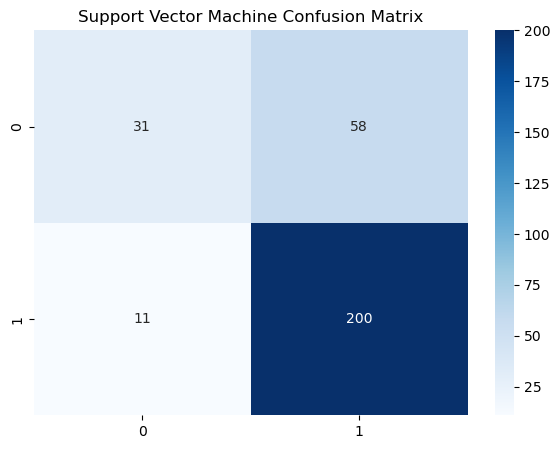

In [102]:
# Confusion Matrix

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

### ***Model Comparison***

In [108]:
# Summary of accuracies
model_accuracies = {
    'Logistic Regrassion': logreg_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Support Vector Machine': svm_accuracy 
}

# Display accuracies
for model, accuracy in model_accuracies.items():
    print(f'{model} Accuracy: {accuracy*100:.2f}%')

Logistic Regrassion Accuracy: 75.33%
K-Nearest Neighbors Accuracy: 75.00%
Decision Tree Accuracy: 71.00%
Support Vector Machine Accuracy: 77.00%
